# Advertising Sales Channel Prediction

#### Problem Statement: Sales Channel Prediction Case Study   

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

In [1]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


We can see in the above dataset that their are 5 columns which contains both feature and one target variable. Sales being the target variable which shows continuous data so it is a regression type model. Features are advertising dollars spent on TV, radio and newspaper. So in order to improve the sales, we are advertising on the mentioned features.

## Exploratory Data Analysis 

#### Feature Selection on General basis 

In [3]:
# Dropping the irrelevant column Unnamed:0 as it shows no relation.

df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

We have 200 rows and 4 columns

In [5]:
# Getting the overview of the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Here it clearly shows their is no null values.

In [6]:
# Checking the unique values in the Features.
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [7]:
# Checking the uniqueness of the target.
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

We have Checked again their is no null values

<AxesSubplot:>

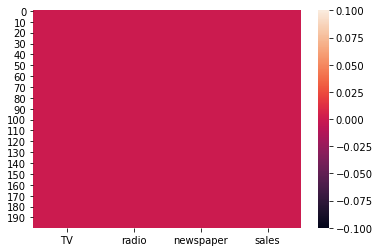

In [9]:
# Lets look into a heatmap for better visualization.
sns.heatmap(df.isnull())

We can clearly visualise their is no null values.

### Statistical overview of the Dataset 

In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The count of all the columns are same, hence we can see that the data is balanced.The mean of TV is higher in comparision to others, hence we can assume that the sales generated from TV is higher.We can also see 0 mean data, which indicates that there may be outliers and skewness in the dataset

### Data Visualization 

In [11]:
import warnings
warnings.filterwarnings('ignore')

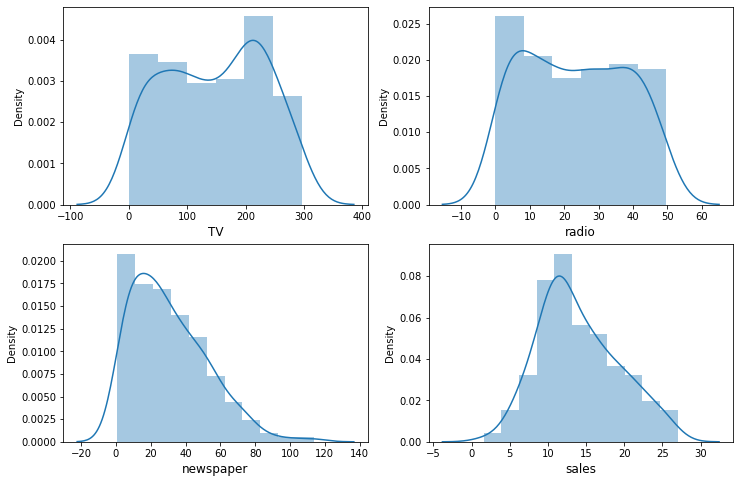

In [12]:
plt.figure(figsize=(12,8), facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()    

We can see in the above plots that:
Tv is normally distributed and left skewness can also be seen.
Radio is normally distributed.
Newspaper is left skewed.
Sales is normally distributed.

### Visualizing the relationship between the features and the label 

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

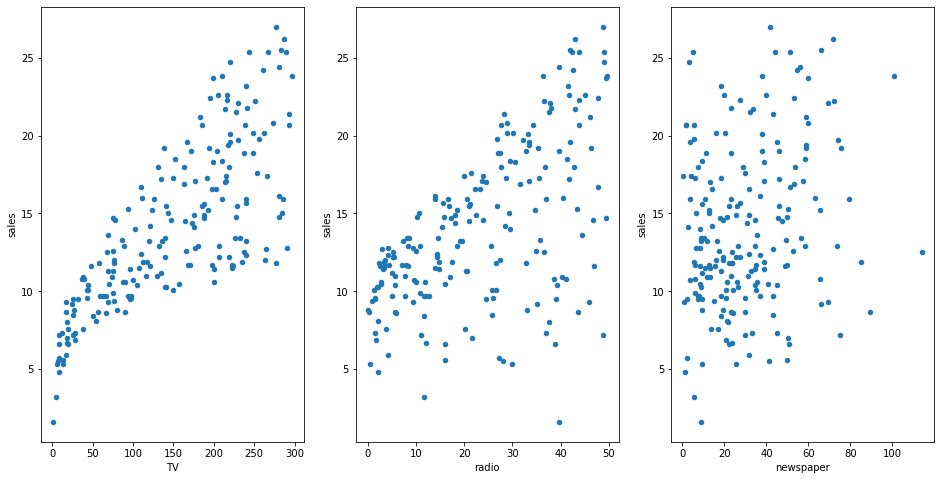

In [13]:
fig, axs = plt.subplots(1,3)

df.plot(x = 'TV',y = 'sales',kind = 'scatter', ax= axs[0], figsize = (16,8))
df.plot(x = 'radio',y = 'sales',kind = 'scatter', ax=axs[1])
df.plot(x = 'newspaper',y = 'sales',kind = 'scatter', ax = axs[2])

In this we can see that in TV plot it is showing upward trending relation. In radio their is upward trending relation though it has outliers and in Newspaper thier is no trend and data is scattered.

#### Lets also see the trend for sales if the advertisement mediums are combined, to see the contribution of newspaper 

<AxesSubplot:title={'center':'Comparison between Radio and Newspaper'}, xlabel='radio', ylabel='newspaper'>

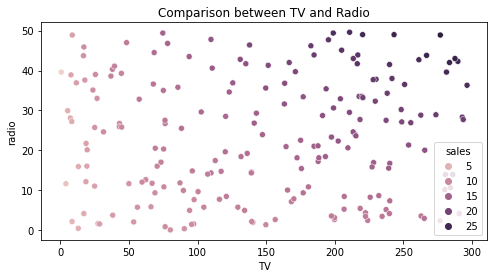

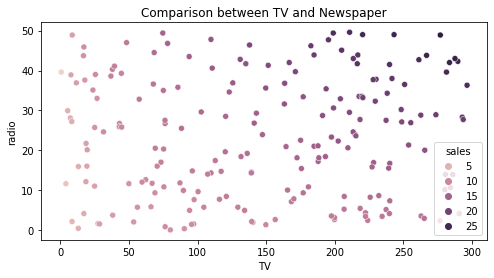

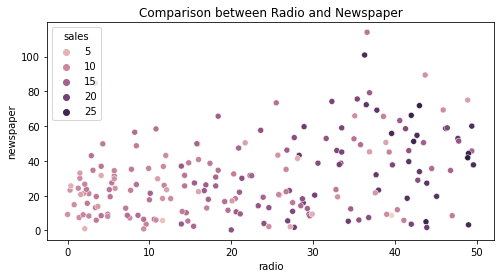

In [14]:
# TV and Radio
plt.figure(figsize=(8,4))
plt.title("Comparison between TV and Radio")
sns.scatterplot(df['TV'],df['radio'],hue = df['sales'])

# TV and Newspaper
plt.figure(figsize=(8,4))
plt.title("Comparison between TV and Newspaper")
sns.scatterplot(df['TV'],df['radio'],hue = df['sales'])

# Radio and Newspaper
plt.figure(figsize=(8,4))
plt.title("Comparison between Radio and Newspaper")
sns.scatterplot(df['radio'], df['newspaper'],hue = df['sales'])

We can clearly see from the above plots that the major contribution for sales seems to be from TV and Radio

When TV and newspaper are combined, the results are not that great and also shows outliers

When Radio and newspaper is combined the results are even worse with more outliers

### Checking the Corelation between the features and also the feature and label 

In [15]:
corr = df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


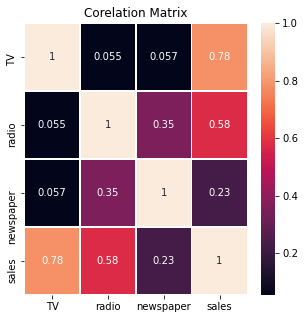

In [16]:
plt.figure(figsize = (5,5))
sns.heatmap(corr,annot=True,linewidth=.5,linecolor='White')
plt.title("Corelation Matrix")
plt.show()

TV shows 78% corelation with sales

Radio shows 58% corelation with sales

Newspaper shows only 23% corelation with sales

Features has no major corelation with each other

### Identifying outliers 

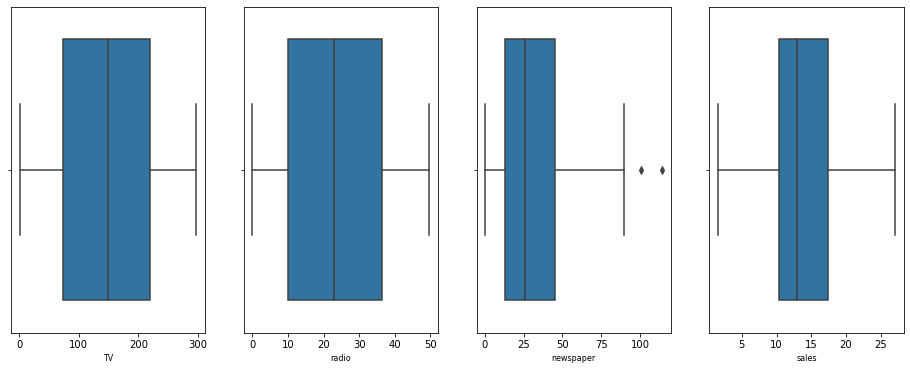

In [17]:
plt.figure(figsize = (16,6))
graph = 1

for columns in df:
    if graph<=5:
        ax = plt.subplot(1,4,graph)
        sns.boxplot(df[columns],orient = 'v')
        plt.xlabel(columns,fontsize=8)
    graph+=1
plt.show()    

As we can see in the above plot Newspaper has Outliers.

### Removing Outliers using ZScore Method

In [18]:
from scipy.stats import zscore

In [19]:
x = df[['newspaper']]

In [20]:
z = np.abs(zscore(x))

new_df = df[(z<3).all(axis=1)]
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [21]:
df.shape

(200, 4)

In [22]:
new_df.shape

(198, 4)

### Checking for Skewness 

In [23]:
new_df.skew().sort_values()

TV          -0.082332
radio        0.114842
sales        0.407130
newspaper    0.650112
dtype: float64

### Removing Skewness using Power Transform

In [24]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [25]:
Scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [26]:
variable = ['newspaper']

In [28]:
new_df[variable] = Scaler.fit_transform(new_df[variable].values)
new_df[variable]

,newspaper
0,1.604196
1,0.831044
2,1.607052
3,1.283768
4,1.280622
...,...
195,-0.687435
196,-1.146090
197,-1.314437
198,1.517395


In [29]:
new_df.skew().sort_values()

newspaper   -0.101288
TV          -0.082332
radio        0.114842
sales        0.407130
dtype: float64

### Preprocessing The Data

#### Spliting the data into feature and label 

In [31]:
x = new_df.drop('sales',axis=1) # x values is for the features
y = new_df['sales']             # y values is for the target

In [32]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,1.604196
1,44.5,39.3,0.831044
2,17.2,45.9,1.607052
3,151.5,41.3,1.283768
4,180.8,10.8,1.280622


### Scaling the data Using StandardScaler 

In [33]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled

,TV,radio,newspaper
0,0.978697,0.989521,1.604196
1,-1.199012,1.090705,0.831044
2,-1.519332,1.535913,1.607052
3,0.056456,1.225616,1.283768
4,0.400243,-0.831784,1.280622
...,...,...,...
193,-1.272932,-1.310720,-0.687435
194,-0.615864,-1.229773,-1.146090
195,0.355657,-0.932968,-1.314437
196,1.606431,1.272836,1.517395


The Data has been scaled now and it is ready for model building.

### Modelling

### Identifying the best Random State 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [36]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 Score is:",maxAccu,"on Random State:",maxRS)

Maximum r2 Score is: 0.9425912979046436 on Random State: 444


In [37]:
# Train test split based on the best random state.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=maxRS)

In [38]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report

## Linear Regression 

In [39]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)
print("r2 Score is:",r2_score(y_test,pred))

r2 Score is: 0.9425912979046436


In [40]:
print("The Mean Absolute Error is:",metrics.mean_absolute_error(y_test,pred))
print("The Mean Squared Error is:",metrics.mean_squared_error(y_test,pred))
print("The Root Mean Square Error is:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

The Mean Absolute Error is: 0.9514390448864892
The Mean Squared Error is: 1.380892973340011
The Root Mean Square Error is: 1.1751140256758112


## Multiple Linear Regression with Ridge 

In [41]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [43]:
ridgecv.alpha_

ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_model.score(x_test,y_test)

0.9425912983519904

## Multiple Linear Regression with Lasso 

In [45]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [46]:
alpha = lasscv.alpha_
alpha

0.005668491850205613

In [47]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.005668491850205613)

In [48]:
lasso_reg.score(x_test,y_test)

0.9426558075173698

## Random Forest Regressor 

In [49]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

predRF = RF.predict(x_test)
print("r2 Score is:",metrics.r2_score(y_test,predRF))

r2 Score is: 0.9738499675494899


In [52]:
print("The mean absolute Error is:",metrics.mean_absolute_error(y_test,predRF))
print("The Mean Squared Error is:",metrics.mean_squared_error(y_test,predRF))
print("The Root Mean Square Error is:",np.sqrt(metrics.mean_squared_error(y_test,predRF)))

The mean absolute Error is: 0.5905166666666667
The Mean Squared Error is: 0.629005616666666
The Root Mean Square Error is: 0.7930987433268735


## Decision Tree Regressor 

In [51]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

predDTR = DTR.predict(x_test)
print("r2 Score is:",metrics.r2_score(y_test,predDTR))

r2 Score is: 0.9406121020770636


In [53]:
print("The Mean Absolute Error is:",metrics.mean_absolute_error(y_test,predDTR))
print("The Mean Squared Error is:",metrics.mean_squared_error(y_test,predDTR))
print("The Root Mean Square is:",np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

The Mean Absolute Error is: 0.9583333333333334
The Mean Squared Error is: 1.4285
The Root Mean Square is: 1.195198728245642


## Support Vector Regressor 

In [54]:
SVR = SVR()
SVR.fit(x_train,y_train)

predSVR = SVR.predict(x_test)
print("r2 Score is:",metrics.r2_score(y_test,predSVR))

r2 Score is: 0.7813674770908703


In [55]:
print("The Mean Absolute Error is:",metrics.mean_absolute_error(y_test,predSVR))
print("The Mean Squared Error is:",metrics.mean_squared_error(y_test,predSVR))
print("The Root Mean Square Error is:",np.sqrt(metrics.mean_squared_error(y_test,predSVR)))

The Mean Absolute Error is: 1.6777679735156332
The Mean Squared Error is: 5.2589259747998405
The Root Mean Square Error is: 2.293234827661537


### Cross Validation Score 

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [58]:
print("The Cross Validation Score for Linear Regression is:",cross_val_score(LR,x_scaled,y,cv=5).mean())
print("The Cross Validation Score for Ridge Regression is:",cross_val_score(ridge_model,x_scaled,y,cv=5).mean())
print("The Cross Validation Score for Lasso Regression is:",cross_val_score(lasso_reg,x_scaled,y,cv=5).mean())
print("The Cross Validation Score for Random Forest Regressor is:",cross_val_score(RF,x_scaled,y,cv=5).mean())
print("The Cross Validation Score for Decision Tree Regressor is:",cross_val_score(DTR,x_scaled,y,cv=5).mean())
print("The Cross Validation Score for Support Vector Regressor is:",cross_val_score(SVR,x_scaled,y,cv=5).mean())

The Cross Validation Score for Linear Regression is: 0.8857739370001966
The Cross Validation Score for Ridge Regression is: 0.8857740596315768
The Cross Validation Score for Lasso Regression is: 0.8859088169559881
The Cross Validation Score for Random Forest Regressor is: 0.9752632813653868
The Cross Validation Score for Decision Tree Regressor is: 0.9534251103009035
The Cross Validation Score for Support Vector Regressor is: 0.9036275725678571


After the cross validation of all the 6 models created, we see that 'RandomForest' is the best fit model.

Will do HyperParameterTuning of the best fit model

### HyperParameterTuning 

In [59]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [60]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [61]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [62]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [63]:
Adv_sales = RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=200)
Adv_sales.fit(x_train, y_train)
pred = Adv_sales.predict(x_test)
print("The Root Mean Square Error value is:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))
print("The r2 Score is:",r2_score(y_test,pred)*100)

The Root Mean Square Error value is: 0.7930987433268735
The r2 Score is: 97.15558617198306


After doing the HyperParemeter Tuning of the RandomForestRegressor Model, getting a score of 97.15%, which is a good score

## Saving the best model 

In [64]:
import joblib
joblib.dump(Adv_sales,"Adv_Sales_Channel.pkl")

['Adv_Sales_Channel.pkl']